# XGBoost Model

## Data Preprocessing

In [21]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error



In [22]:
data = pd.read_csv('dengue-dataset.csv')
data.head()

,serial,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels
0,0,34.053151,24.478082,28.709863,39.757808,25.317808,32.306301,22.971233,73.508219,2.921726,...,1007.911781,50.747945,3.789863,208.097808,17.973699,7.232877,2.558904,1.197260,4925.0,normal
1,1,34.086179,25.694309,29.464228,41.338211,28.140650,34.423577,23.484553,72.066667,3.783415,...,1003.533333,48.313821,2.884553,222.926016,19.246341,7.504065,1.658537,0.991870,5077.0,normal
2,2,34.573984,25.417886,29.526829,40.464228,26.560163,33.085366,22.580488,69.424390,3.065854,...,1005.731707,55.621138,4.242276,229.413008,19.802439,7.829268,1.910569,1.170732,7579.0,normal
3,3,33.020325,25.080488,28.727642,37.878049,26.193496,31.772358,21.752033,69.297561,6.025203,...,1003.359350,50.208130,2.991057,225.421951,19.480488,7.593496,1.300813,0.146341,13706.0,normal
4,4,30.660976,24.230894,26.774797,36.586992,24.263415,28.943902,24.214634,86.652033,23.336585,...,1009.995935,45.542276,3.886992,176.598374,15.261789,6.186992,0.967480,3.951220,82.0,normal


['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precipcover', 'windspeed', 'winddir', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy']


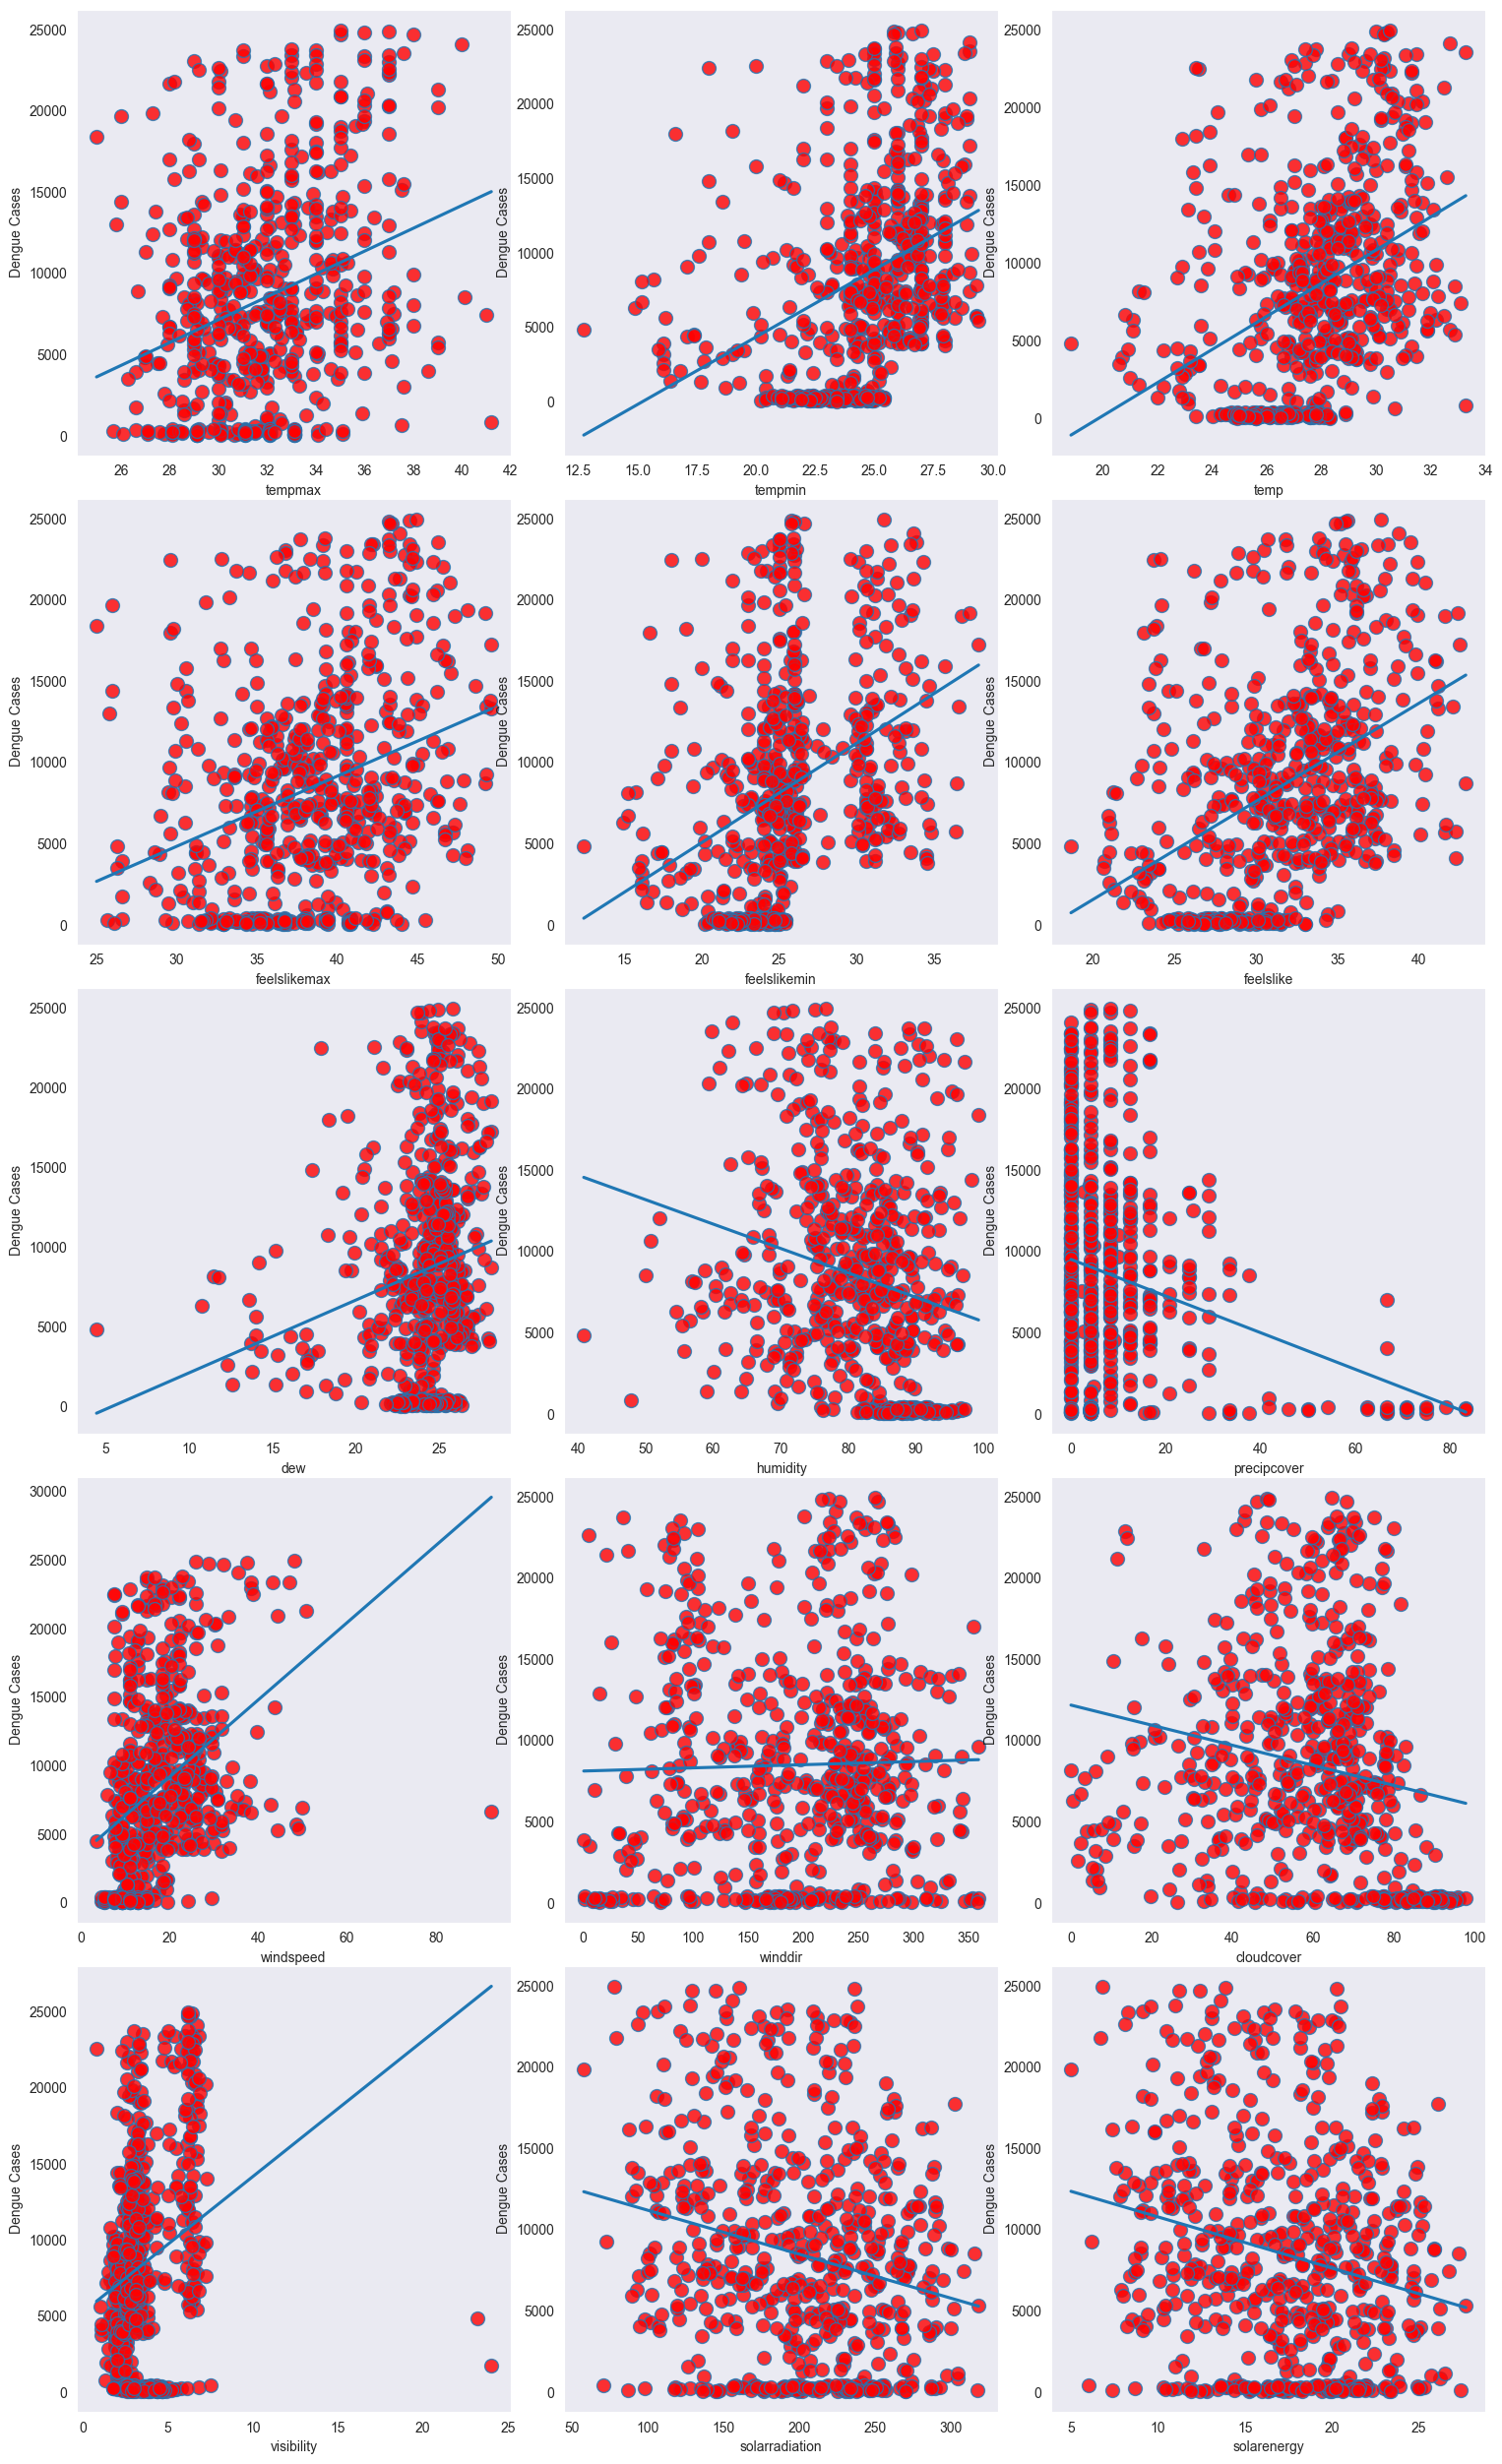

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('dark')

data = data.dropna()

target_column = 'cases'
columns_to_exclude = ['labels', 'serial','snow', 'snowdepth', 'precip','precipprob','sealevelpressure','stations','conditions','uvindex',target_column]
numeric_columns = [col for col in data.columns if col not in columns_to_exclude]

print(numeric_columns)

num_cols = 3  # Number of subplots per row
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols  # Calculate the number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout()

for i, column in enumerate(numeric_columns):
    row = i // num_cols
    col = i % num_cols
    sns.regplot(x=column, y='cases', data=data, ax=axes[row, col], ci=None, scatter_kws={'s':100, 'facecolor':'red'})
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Dengue Cases')

In [24]:
# Split the dataset into features (X) and the target variable (y)
X = data.drop(columns_to_exclude, axis=1)
y = data[target_column]

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Create an XGBoost regressor and fit it to the training data
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [28]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 28519375.55482013


### Handling missing values